In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as tck
import sklearn as skl

In [3]:
mpl.rcParams['axes.grid'] = False


In [4]:
def generate_circle(R: float, P: int, closed=False) -> tuple[np.ndarray, np.ndarray]:
    phi = np.linspace(0,2*np.pi, P+int(closed), endpoint=closed)
    return np.array([R*np.cos(phi), R*np.sin(phi)])

generate_circle(1,5)

array([[ 1.        ,  0.30901699, -0.80901699, -0.80901699,  0.30901699],
       [ 0.        ,  0.95105652,  0.58778525, -0.58778525, -0.95105652]])

(-4.0, 4.0)

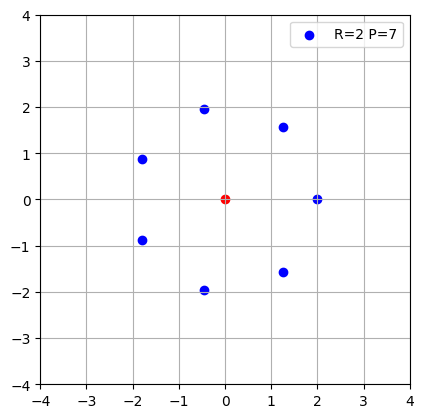

In [5]:
C = generate_circle(2,7)

def plot_clique(center, clique, label=None):
    plt.scatter(*center, color='red')
    plt.scatter(*clique, color='blue', label=label)

plot_clique((0,0), C, "R=2 P=7")
plt.legend()
plt.gca().set_aspect('equal')
plt.grid(True, 'both')
plt.xlim(-4, 4)
plt.ylim(-4, 4)

ALL TESTS OK
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
[0.48 0.12 0.32 0.08]


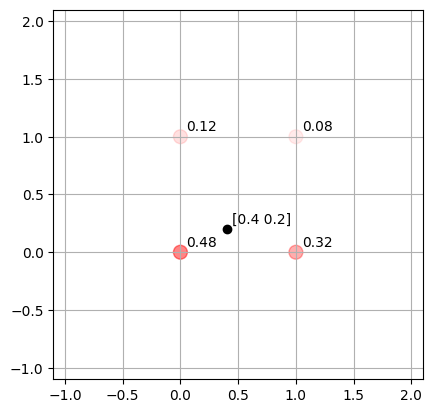

In [6]:

# Always returns 4 points. Points can repeat with different weights.
def get_interp_nodes(point, tol=1e-18):
    # X axis from top to bottom. Y axis from left to right. Pixels are defined on integer lattice. 

    p0 = np.floor(point).astype(int)
    p1 = np.ceil(point).astype(int)
    rint = np.rint(point) # nearest integer point
    nodes = []
    weights = []

    x,y = point
    x0, y0 = p0
    x1, y1 = p1
    xisint, yisint = (np.abs(point - rint) < tol) # bool

    if xisint: 
        x0 = x1 = rint[0]
        
    if yisint:
        y0 = y1 = rint[1]
        
    p00 = (x0, y0)
    p01 = (x0, y1)
    p10 = (x1, y0)
    p11 = (x1, y1)
    dx, dy = x-x0, y-y0 # weights; in (0;1)
    w00 = (1-dx) * (1-dy)
    w01 = (1-dx) * dy
    w10 = dx * (1-dy)
    w11 = dx * dy

    return np.array([p00,p01,p10,p11], dtype=np.int64), np.array([w00, w01, w10, w11], dtype=np.float64)

def test_interp_nodes():
    nodes, w = get_interp_nodes((0,0))
    assert (nodes == 0).all(), nodes
    assert (w == np.array((1, 0, 0, 0)).astype(np.float64)).all(), w

    nodes, w = get_interp_nodes((0.0,0.0))
    assert (nodes == 0).all(), nodes
    assert (w == np.array((1, 0, 0, 0)).astype(np.float64)).all(), w

    nodes, w = get_interp_nodes((0,0.3))
    assert ( nodes == ((0,0), (0,1), (0,0), (0,1)) ).all(), nodes
    assert ( w == ( 0.7, 0.3, 0.0, 0.0 ) ).all(), w

    nodes, w = get_interp_nodes((0.3,0))
    assert ( nodes == ((0,0), (0,0), (1,0), (1,0)) ).all(), nodes
    assert ( w == ( 0.7, 0.0, 0.3, 0.0 ) ).all(), w
    
    nodes, w = get_interp_nodes((0.4,0.2))
    wtrue = np.array(( 0.48, 0.12, 0.32, 0.08 )).astype(np.float64)
    assert ( nodes == ((0,0), (0,1), (1,0), (1,1)) ).all(), nodes
    assert (np.abs(w - wtrue) < 1e-12).all(), w-wtrue
    
    nodes, w = get_interp_nodes((3.4,-3.8))
    wtrue = np.array(( 0.48, 0.12, 0.32, 0.08 )).astype(np.float64)
    assert ( nodes == ((3,-4), (3,-3), (4,-4), (4,-3)) ).all(), nodes
    assert (np.abs(w - wtrue) < 1e-12).all(), w-wtrue

    print("ALL TESTS OK")


def demo_interp_nodes():
    p = np.array((0.4,0.2))
    pp, ww = get_interp_nodes(p)
    print(pp)
    print(ww)
    plt.xlim(-1.1, 2.1)
    plt.ylim(-1.1, 2.1)
    plt.grid()
    plt.scatter(*p, c = 'k')
    plt.scatter(*pp.T, c = 'r', alpha = ww, s=100)
    plt.gca().set_aspect('equal')

    plt.annotate(p, p+0.05)
    for p,w in zip(pp,ww):
        plt.annotate(f"{w:.2f}", p+0.05)


test_interp_nodes()
demo_interp_nodes()

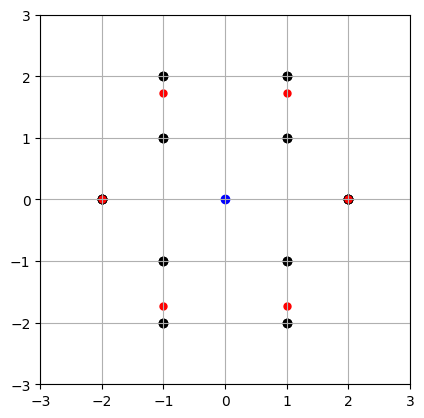

In [7]:
def normalpha(a):
    return a*9/10 + 0.09

def show_interp_circle(center, R, P, tol=1e-6, draw_circle=False, draw_weights=True):
    C = generate_circle(R, P) + np.array(center).reshape(-1,1)

    plt.scatter(*center, c='blue')

    if draw_circle:
        line = generate_circle(R, 47, closed=True)
        plt.plot(*line.T, c='blue', linewidth=0.5)

    for x,y in zip(*C):
        nodes, weights = get_interp_nodes((x,y), tol)
        alpha = normalpha(weights) if draw_weights else None
        plt.scatter(*nodes.T, c='k', alpha=alpha) # interp nodes
        plt.scatter(x, y, c='r', s=25) # circle point
        
        # for n,w in zip(nodes,weights):
        #     if w > 1e-12:
        #         all_nodes.append(n)
        #         all_weights.append(w)


plt.xlim(-3,3), plt.ylim(-3,3)
plt.grid()
plt.gca().set_aspect(1)
show_interp_circle((0,0), 2, 6, draw_weights=False)

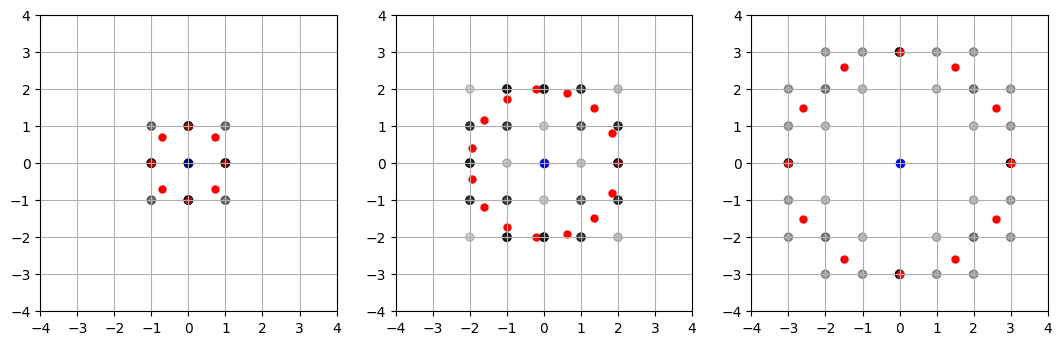

In [8]:
plt.gcf().set_size_inches(13,5)
draw_weights = True

plt.subplot(131)
plt.xlim(-4,4), plt.ylim(-4,4)
plt.gca().xaxis.set_major_locator(tck.MultipleLocator())
plt.grid()
plt.gca().set_aspect(1)
show_interp_circle((0,0), 1, 8, draw_weights=draw_weights);

plt.subplot(132)
plt.xlim(-4,4), plt.ylim(-4,4)
plt.gca().xaxis.set_major_locator(tck.MultipleLocator())
plt.grid()
plt.gca().set_aspect(1)
show_interp_circle((0,0), 2, 15, draw_weights=draw_weights);

plt.subplot(133)
plt.xlim(-4,4), plt.ylim(-4,4)
plt.gca().xaxis.set_major_locator(tck.MultipleLocator())
plt.grid()
plt.gca().set_aspect(1)
show_interp_circle((0,0), 3, 12, draw_weights=draw_weights);

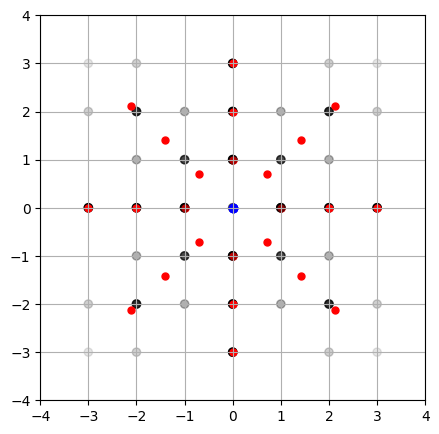

In [9]:
plt.gcf().set_size_inches(13,5)
draw_weights = True
plt.xlim(-4,4), plt.ylim(-4,4)
plt.gca().xaxis.set_major_locator(tck.MultipleLocator())
plt.grid()
plt.gca().set_aspect(1)
show_interp_circle((0,0), 1, 8, draw_weights=draw_weights);
show_interp_circle((0,0), 2, 8, draw_weights=draw_weights);
show_interp_circle((0,0), 3, 8, draw_weights=draw_weights);

In [10]:
def plt_defaults(R=None):    
    plt.gca().xaxis.set_major_locator(tck.MultipleLocator())
    plt.gca().yaxis.set_major_locator(tck.MultipleLocator())
    plt.grid()
    plt.gca().set_aspect(1)

    if R is not None:
        plt.xlim(-R-0.2, R+0.2)
        plt.ylim(-R-0.2, R+0.2)

---

In [11]:
np.arange(3,-4,-1)

array([ 3,  2,  1,  0, -1, -2, -3])

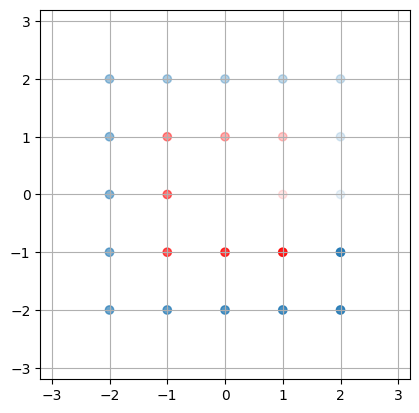

In [12]:
# Коло радіуса R має діаметр 2R+1 та всього 8R точок

# This function builds a circle around (0,0) of inf-norm of R on rectangular lattice.
# Points are listed going CCW starting from (R, 0)
def build_linf_circle(R: int):
    if R == 0: 
        return np.array([0]), np.array([0])
    xx = np.zeros(8*R, dtype=np.int64)
    yy = np.zeros(8*R, dtype=np.int64)

    xx[0:R+1] = R
    yy[0:R+1] = np.arange(0,R+1)
    k = R
    xx[k:k+2*R+1] = np.arange(R, -R-1, -1)
    yy[k:k+2*R+1] = R
    k += 2*R
    xx[k:k+2*R+1] = -R
    yy[k:k+2*R+1] = np.arange(R, -R-1, -1)
    k += 2*R
    xx[k:k+2*R+1] = np.arange(-R, R+1)
    yy[k:k+2*R+1] = -R
    k += 2*R
    xx[k:k+R+1] = R
    yy[k:k+R+1] = np.arange(-R, 0)

    return xx,yy

# xx,yy = np.meshgrid(np.arange(-R, R+1),np.arange(-R, R+1))
# full_clique = np.array([xx,yy])
# full_clique = np.moveaxis(np.array(full_clique), (0,1,2), (2,0,1)).reshape(-1,2) # list of points on rectangular grid of radius R

plt_defaults(3)

R = 1
plt.scatter(*build_linf_circle(R), alpha=(0.1 + (9/10)*np.arange(8*R)/(8*R)), c = 'r')
R = 2
plt.scatter(*build_linf_circle(R), alpha=(0.1 + (9/10)*np.arange(8*R)/(8*R)))

(array([ 0,  1,  1,  0, -1, -1, -1,  0,  1,  2,  2,  2,  1,  0, -1, -2, -2,
       -2, -2, -2, -1,  0,  1,  2,  2]), array([ 0,  0,  1,  1,  1,  0, -1, -1, -1,  0,  1,  2,  2,  2,  2,  2,  1,
        0, -1, -2, -2, -2, -2, -2, -1]))


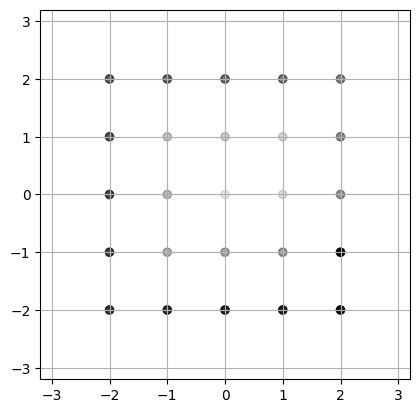

In [13]:
def build_square_clique(R: int):
    diam = 2*R+1
    xx = np.zeros(diam*diam, dtype=np.int64)
    yy = np.zeros(diam*diam, dtype=np.int64)
    k = 1
    xx[0] = yy[0] = 0
    for r in range(1,R+1):
        rxx,ryy = build_linf_circle(r)
        xx[k:k+8*r] = rxx
        yy[k:k+8*r] = ryy
        k+=8*r

    return xx,yy


plt_defaults(3)
R = 2
C = build_square_clique(R)
plt.scatter(*C, alpha=(0.1 + (9/10)*np.arange((2*R+1)**2 + 1)/((2*R+1)**2)), c = 'k')
assert len(C[0]) == (2*R+1)**2
print(C)

In [14]:
universal_clique_r = 2
universal_clique_size = (universal_clique_r*2+1)**2
universal_clique_r, universal_clique_size

(2, 25)

[[19 18 17 16 15]
 [20  6  5  4 14]
 [21  7  0  3 13]
 [22  8  1  2 12]
 [23 24  9 10 11]]


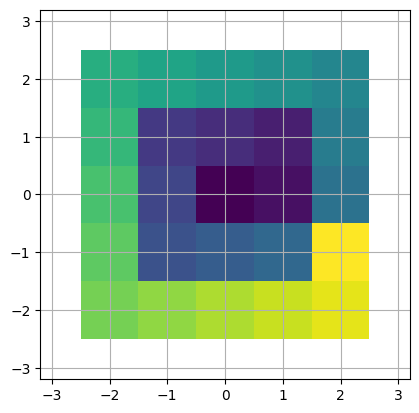

In [15]:
# Reverse lookup list. Returns an order for meshgrid of a full square clique 
def get_square_clique_order(R:int, clique: tuple[np.typing.ArrayLike,np.typing.ArrayLike]):
    diam = 2*R+1
    L = diam*diam
    assert len(clique[0]) == len(clique[1])
    assert len(clique[1]) == L

    idx = clique[0]+R, clique[1]+R
    order = np.zeros((diam, diam), dtype=np.int64)
    order[*idx] = np.arange(L)
    # order = np.rot90(order)
    # output looks rotated by 90 deg, but it is ok, as it will be used for lookup, not for plotting
    return order

# first 2 arguments should match those for get_square_clique_order
def get_clique_node_id(R:int, clique_order, node: np.typing.ArrayLike ):
    return clique_order[node[0] + R, node[1] + R]

CO = get_square_clique_order(universal_clique_r, C)
print(CO)
plt_defaults(3)
mg = np.mgrid[-R:R+1, -R:R+1]
plt.pcolormesh(*mg, CO)

# Перевірка
for n,(x,y) in enumerate(zip(*C)):
    assert get_clique_node_id(R, CO, (x,y)) == n

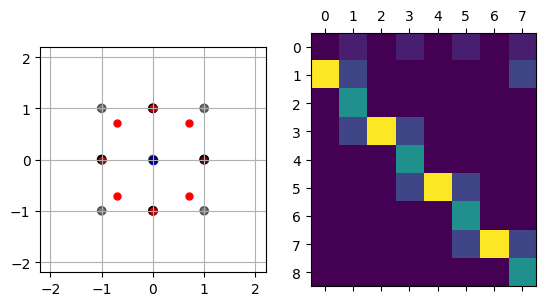

In [16]:
# Обчислимо матрицю утворення вектора фіч з вузлів кліки пронумерованих як вказано вище

R = 1
P = 8
r1_clique = build_square_clique(R)
r1_clique_order = get_square_clique_order(R, r1_clique)
r1_setup = []
r1_matrix = np.zeros((len(r1_clique[0]), P), dtype=np.float64)
for feat_n,(x,y) in enumerate(zip(*generate_circle(R=R, P=P))):
    nodes, weights = u = get_interp_nodes((x,y))
    r1_setup.append(u)
    for node,w in zip(*u):
        # print(get_clique_node_id(R, r1_clique_order, node), feat_n, "-> ", w)
        r1_matrix[get_clique_node_id(R, r1_clique_order, node), feat_n] += w

plt.subplot(121)
plt_defaults(2)
show_interp_circle((0,0), R, P, draw_weights=True)

plt.subplot(122)
plt.matshow(r1_matrix, 0)


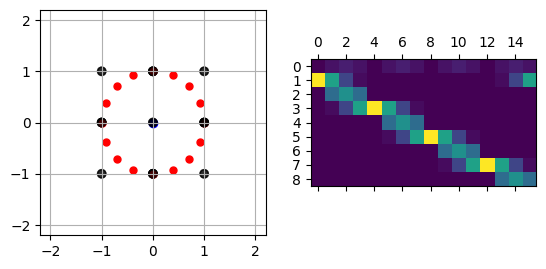

In [17]:
# Обчислимо матрицю утворення вектора фіч з вузлів кліки пронумерованих як вказано вище

R = 1
P = 16
r1_clique = build_square_clique(R)
r1_clique_order = get_square_clique_order(R, r1_clique)
r1_setup = []
r1_matrix = np.zeros((len(r1_clique[0]), P), dtype=np.float64)
for feat_n,(x,y) in enumerate(zip(*generate_circle(R=R, P=P))):
    nodes, weights = u = get_interp_nodes((x,y))
    r1_setup.append(u)
    for node,w in zip(*u):
        # print(get_clique_node_id(R, r1_clique_order, node), feat_n, "-> ", w)
        r1_matrix[get_clique_node_id(R, r1_clique_order, node), feat_n] += w

plt.subplot(121)
plt_defaults(2)
show_interp_circle((0,0), R, P, draw_weights=True)

plt.subplot(122)
plt.matshow(r1_matrix, 0)

In [18]:
np.linalg.matrix_rank(r1_matrix)

np.int64(9)

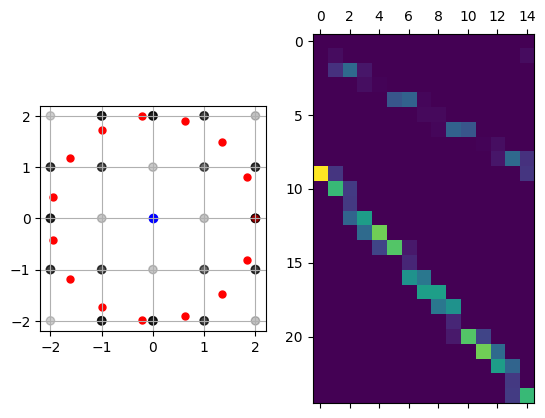

In [19]:
R = 2
P = 15
r2_clique = build_square_clique(R)
r2_clique_order = get_square_clique_order(R, r2_clique)
r2_setup = []
r2_matrix = np.zeros((len(r2_clique[0]), P), dtype=np.float64)
for feat_n,(x,y) in enumerate(zip(*generate_circle(R=R, P=P))):
    nodes, weights = u = get_interp_nodes((x,y))
    r2_setup.append(u)
    for node,w in zip(*u):
        # print(get_clique_node_id(R, r1_clique_order, node), feat_n, "-> ", w)
        r2_matrix[get_clique_node_id(R, r2_clique_order, node), feat_n] += w

plt.subplot(121)
plt_defaults(2)
show_interp_circle((0,0), R, P, draw_weights=True)

plt.subplot(122)
plt.matshow(r2_matrix, 0)